In [ ]:
import os 
if os.path.basename(os.getcwd()) == "notebooks": os.chdir("..")
import datajoint as dj
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from datetime import datetime
from pathlib import Path
from workflow.pipeline import ephys, probe, lineage, analysis

In [ ]:
ephys.LFP.Trace()

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",lfp
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,19,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,14,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,20,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,=BLOB=
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,13,=BLOB=


In [ ]:
key = {'organoid_id': 'O17',
 'experiment_start_time': datetime(2023, 7, 13, 18, 15),
 'insertion_number': 0,
 'start_time': datetime(2023, 7, 13, 18, 30),
 'end_time': datetime(2023, 7, 13, 18, 35)}  # organoid key

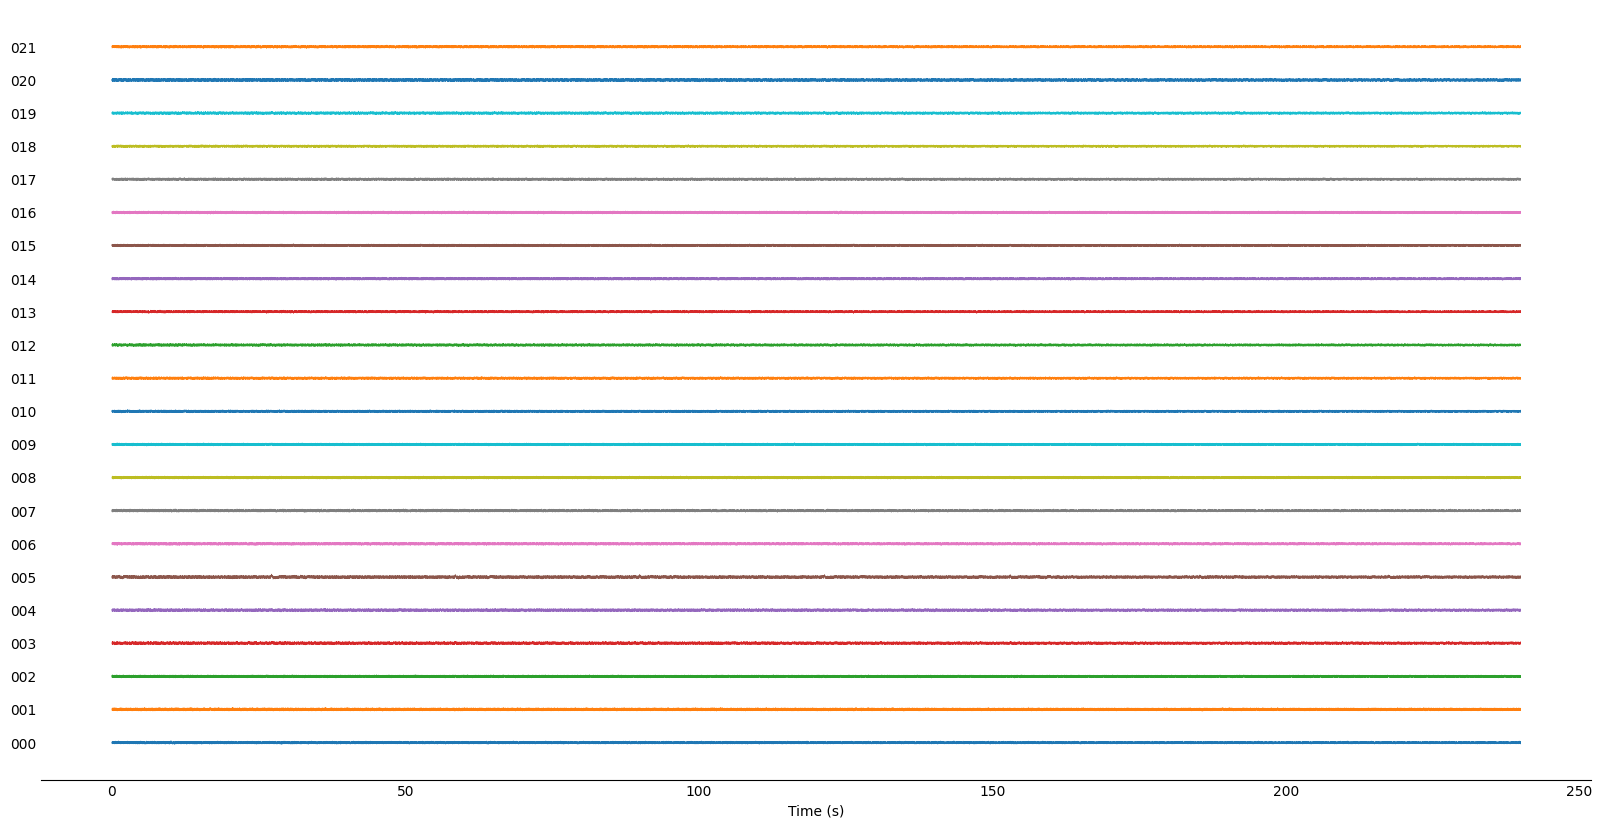

In [ ]:
lfp_traces, ti, tf, electrodes = (ephys.LFP.Trace & key).fetch("lfp", "start_time", "end_time", "electrode")
sampling_rate = (ephys.LFP & key).fetch1("lfp_sampling_rate")

idx = np.argsort(electrodes)

labels = np.array([f'D-0{x}' for x in electrodes])

labels = labels[idx]
lfp_traces = lfp_traces[idx]
electrodes = electrodes[idx]

# Plot all channels (sorted according to electrodes)
fig, ax = plt.subplots(figsize=(20, 10))
ytick_loc = []
for i, (lfp_trace, electrode) in enumerate(zip(lfp_traces, electrodes)): 
    ytick_loc.append(i * 500)
    ax.plot(np.r_[:len(lfp_trace)] / sampling_rate, lfp_trace + i * 500, linewidth=0.1)
ax.set_yticks(ytick_loc)
ax.set_yticklabels([f'{x:03d}' for x in electrodes])
ax.tick_params(length=0)
ax.set(xlabel="Time (s)")
sns.despine(right = True, left = True)
plt.show()

### Spectral Analysis

In [ ]:
analysis.SpectralBand()

band_name,lower_freq (Hz),upper_freq (Hz)
alpha,8.0,12.0
beta,13.0,30.0
delta,2.0,4.0
gamma,30.0,50.0
highgamma1,70.0,110.0
highgamma2,130.0,500.0
theta,4.0,7.0


In [ ]:
analysis.SpectrogramParameters()

param_idx,window_size Time in seconds,overlap_size Time in seconds,description
0,0.5,0.0,Default 0.5s time segments without overlap.


In [ ]:
analysis.LFPSpectrogram.populate(key)
display(analysis.LFPSpectrogram())

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",param_idx
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,0
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,0


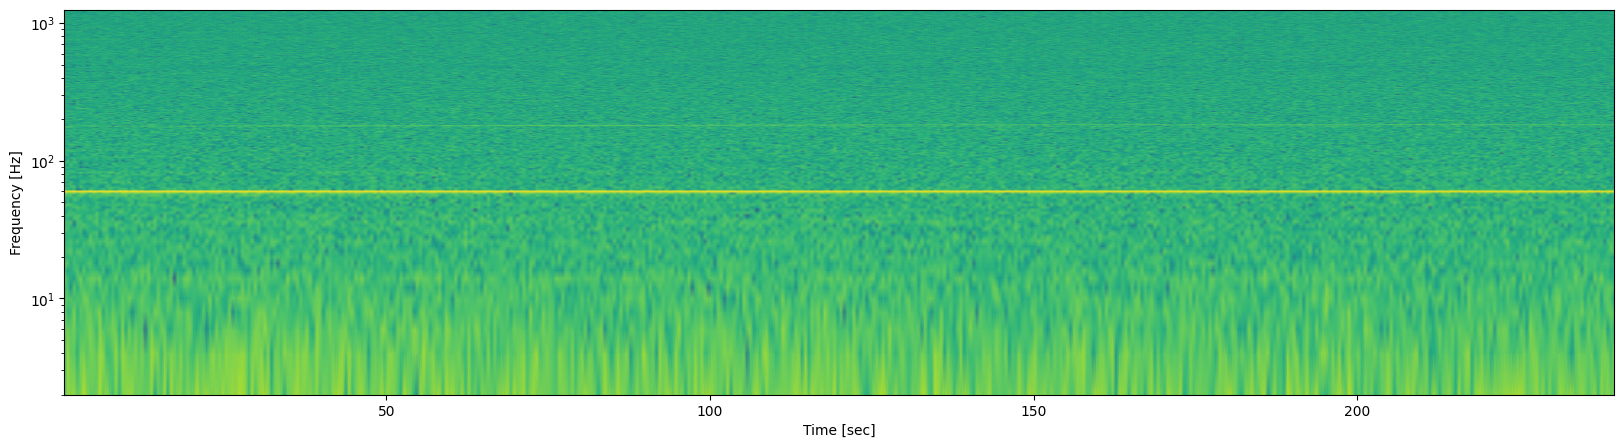

In [ ]:
electrode = 1  # select electrode

Sxx, t, f = (analysis.LFPSpectrogram.ChannelSpectrogram & {"electrode": electrode}).fetch("spectrogram", "time", "frequency", limit=1)
Sxx = Sxx[0]
t = t[0]
f = f[0]

fig, ax = plt.subplots(figsize=(20, 5))
ax.pcolormesh(t, f[1:1000], np.log(Sxx[1:1000]), shading='gouraud')
plt.yscale("log")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
(analysis.LFPSpectrogram.ChannelPower & {"electrode": electrode})

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",param_idx,band_name,power Mean power in spectral band as a function of time,mean_power Mean power in a spectral band for a time window.,std_power Standard deviation of the power in a spectral band for a time window.
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,alpha,=BLOB=,0.157599,0.120326
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,beta,=BLOB=,0.0781521,0.0295777
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,delta,=BLOB=,0.965238,0.921115
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,gamma,=BLOB=,0.052986,0.0179512
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,highgamma1,=BLOB=,0.0328096,0.00761946
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,highgamma2,=BLOB=,0.0238766,0.00176855
O17,2023-07-13 18:15:00,0,2023-07-13 18:30:00,2023-07-13 18:35:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,theta,=BLOB=,0.343281,0.287445
